In [1]:
# Date Time Indexing
import pandas as pd
# Load data from a CSV file
df = pd.read_csv('AirPassengers.csv')

In [2]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df['Month'].dtype

dtype('O')

In [5]:
# Convert date column to datetime format
df['Month'] = pd.to_datetime(df['Month'])


In [6]:
df.index

RangeIndex(start=0, stop=144, step=1)

In [7]:
# Set date column as index
df.set_index('Month', inplace=True)

In [8]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [9]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
df.loc["1949-01-01"]

#Passengers    112
Name: 1949-01-01 00:00:00, dtype: int64

In [11]:
df.loc["1949"].mean()

#Passengers    126.666667
dtype: float64

In [12]:
# Resample data to daily D/monthly M frequency
df = df.resample('M').mean()

In [13]:
df.head()

,#Passengers
Month,
1949-01-31,112.0
1949-02-28,118.0
1949-03-31,132.0
1949-04-30,129.0
1949-05-31,121.0


<Axes: xlabel='Month'>

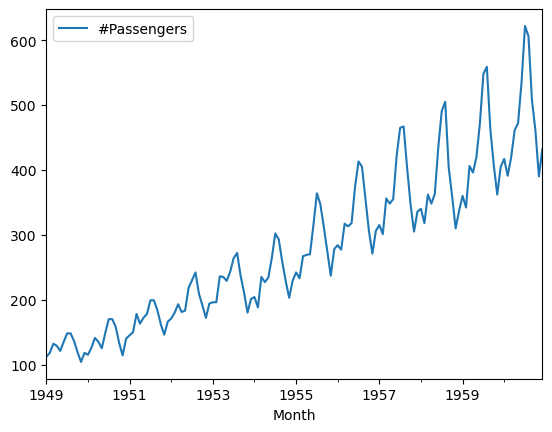

In [14]:
%matplotlib inline
df.plot()

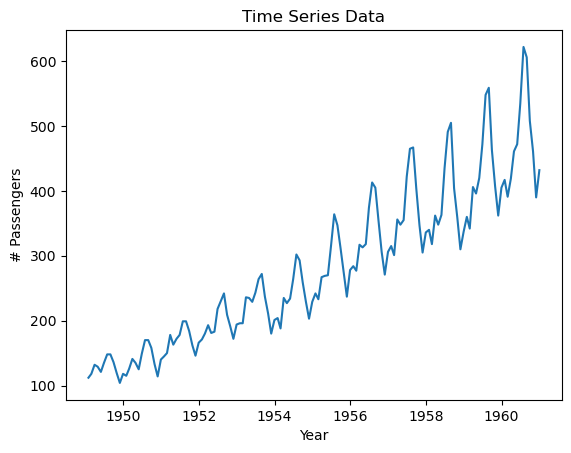

In [15]:
import matplotlib.pyplot as plt
# Create a line chart
plt.plot(df.index, df)
# Add labels and title
plt.xlabel('Year')
plt.ylabel('# Passengers')
plt.title('Time Series Data')
# Display the chart
plt.show()

In [16]:
# CHeck stationarity
rolmean = df.rolling(window=12).mean()
rolstd = df.rolling(window=12).std()

In [17]:
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-31          NaN
1949-02-28          NaN
1949-03-31          NaN
1949-04-30          NaN
1949-05-31          NaN
...                 ...
1960-08-31   463.333333
1960-09-30   467.083333
1960-10-31   471.583333
1960-11-30   473.916667
1960-12-31   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-31          NaN
1949-02-28          NaN
1949-03-31          NaN
1949-04-30          NaN
1949-05-31          NaN
...                 ...
1960-08-31    83.630500
1960-09-30    84.617276
1960-10-31    82.541954
1960-11-30    79.502382
1960-12-31    77.737125

[144 rows x 1 columns]


In [18]:
rolmean.loc["1949"]

,#Passengers
Month,
1949-01-31,NaN
1949-02-28,NaN
1949-03-31,NaN
1949-04-30,NaN
1949-05-31,NaN
1949-06-30,NaN
1949-07-31,NaN
1949-08-31,NaN
1949-09-30,NaN


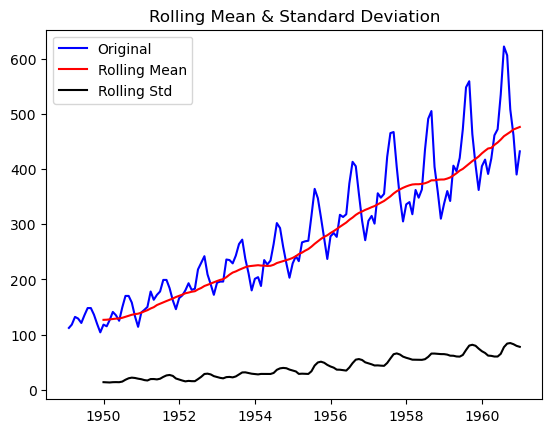

In [19]:
#Plot rolling statistics:

orig = plt.plot(df, color="blue", label="Original")

mean = plt.plot(rolmean, color="red", label='Rolling Mean')
std= plt.plot(rolstd, color='black', label='Rolling Std')

plt.legend(loc='best')

plt.title("Rolling Mean & Standard Deviation") 
plt.show()

In [20]:
# Perform Dickey-Fuller test: 
from statsmodels.tsa.stattools import adfuller

print ("Results of Dickey-Fuller Test:")

dftest = adfuller(df,autolag="AIC")

dfoutput=pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'lags Used', 'Number of observations used'])

print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
lags Used                       13.000000
Number of observations used    130.000000
dtype: float64


In [21]:
dftest

(0.8153688792060597,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

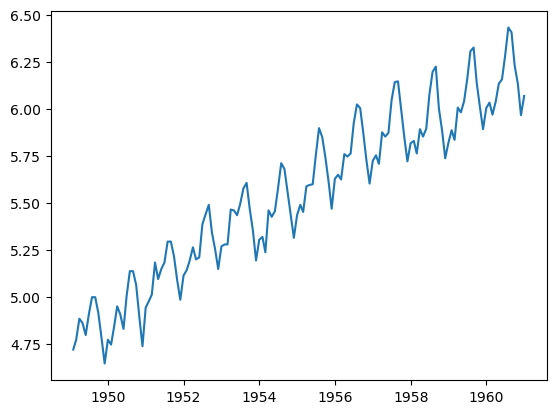

In [22]:
import numpy as np
df_log = np.log(df)
plt.plot(df_log)

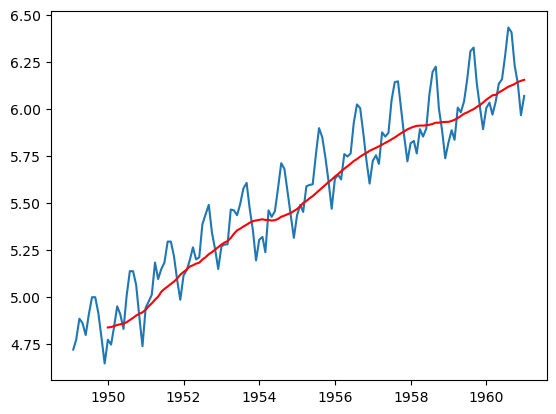

In [23]:
ma = df_log.rolling(window=12).mean()
mstd = df_log.rolling(window=12).std()
plt.plot(df_log)
plt.plot(ma,color='red')


In [24]:
# Data transformation
df_log_minus_ma = df_log - ma
df_log_minus_ma.dropna(inplace=True)

In [25]:
def check_stationarity(df):
    rolmean = df.rolling(window=12).mean()
    rolstd = df.rolling(window=12).std()
    #Plot rolling statistics:
    orig = plt.plot(df, color="blue", label="Original")
    mean = plt.plot(rolmean, color="red", label='Rolling Mean')
    std= plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title("Rolling Mean & Standard Deviation") 
    plt.show()
    print ("Results of Dickey-Fuller Test:")
    
    dftest = adfuller(df,autolag="AIC")
    
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'lags Used', 'Number of observations used'])
    
    print(dfoutput)
    print(dftest)

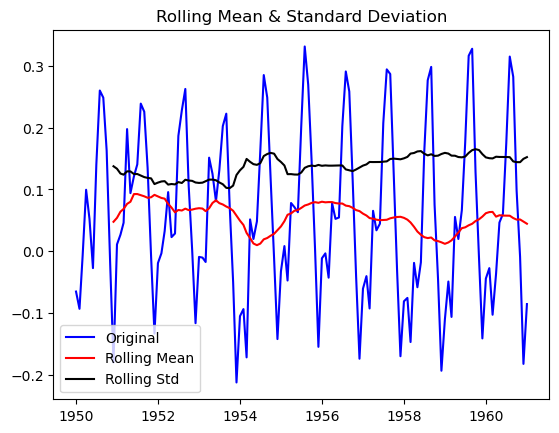

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
lags Used                       13.000000
Number of observations used    119.000000
dtype: float64
(-3.1629079913008766, 0.02223463000124264, 13, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, -436.63269481747034)


In [26]:
check_stationarity(df_log_minus_ma)